# True Reach Estimator

We are looking to build an estimator around instagram users true reach and impressions. This data is accessible through the business api but in Q1 2018 Instagram blocked influencer marketing teams from this endpoint. We are able to collect a sample of this data to see if there working correlations between currently public data and true reach/impressions. 

Data: the CSV we have contains one year worth of data from 5,000 influencer level Instagram users. 

## The goal: 
Given the public data points create an accurate estimate of each posts reach and impressions. The ideal would be as accurate as possible, but a 10% range will work for the business. 

## TRIAL 9 Group-By + Log Transform 

In this trial we will first normalize each users data to their central tendancies before creating coefficiencies just like Trial 4. However in this one we will perform a log transformation on the values to create a more normal distribution. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Pull in the CSV file

In [2]:
df = pd.read_csv('trial_4_groupby.csv')

In [3]:
df.head()

,Unnamed: 0,followers,likes,comments,impressions,reach
0,0,100276.0,1472.0,69.0,6209.0,5302.0
1,1,10299.0,562.0,11.0,710.0,574.0
2,2,40025.0,1600.0,133.0,3371.0,2789.0
3,3,22071.0,807.0,34.0,11333.0,8932.0
4,4,24390.0,1467.0,76.0,6198.0,4824.0


Drop columns that are unneeded.

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head()

,followers,likes,comments,impressions,reach
0,100276.0,1472.0,69.0,6209.0,5302.0
1,10299.0,562.0,11.0,710.0,574.0
2,40025.0,1600.0,133.0,3371.0,2789.0
3,22071.0,807.0,34.0,11333.0,8932.0
4,24390.0,1467.0,76.0,6198.0,4824.0


In [6]:
len(df)

5093

## Create histograms of our three variables to check for normality. 

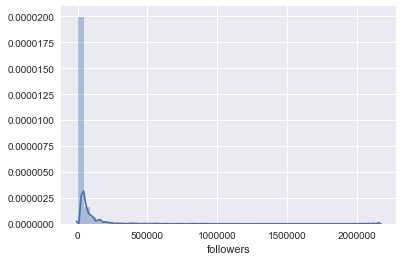

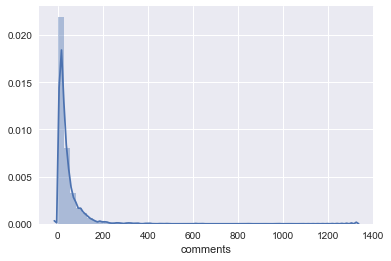

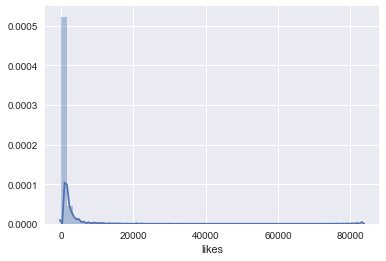

In [7]:
sns.distplot(df.followers)
plt.show()
sns.distplot(df.comments)
plt.show()
sns.distplot(df.likes)
plt.show()

## Trial Anyone with very little reach will skew the  data. It's probably a bot. 

We have decided to remove rows that have less than 300 followers. This not only helps eliminate outliers but in the data collection there were many rows with zero followers and high numbers in reach. This data clearly is not correct 

In [8]:
df = df[(df['followers']>300)]

Setting comments to greater than zero to avoid zero division errors

In [9]:
df = df[(df['comments']>=1)]

Remove rows with less than 100 likes to eliminate outliers.

In [10]:
df = df[(df['likes']>=100)]

Remove wierd situations where there are more comments or likes than reach.

In [11]:
df = df.loc[(df.likes<df.reach)]
df = df.loc[(df.comments<df.reach)]

Now, what does our data look like? 

In [12]:
df.describe()

,followers,likes,comments,impressions,reach
count,3.964000e+03,3964.000000,3964.000000,3964.000000,3964.000000
mean,3.129303e+04,1154.968971,46.018668,10488.076186,8247.674067
std,8.305952e+04,2652.701190,64.735364,28801.698750,22151.026399
min,3.010000e+02,100.000000,1.000000,220.000000,165.000000
25%,3.046000e+03,248.000000,14.000000,1543.000000,1183.500000
50%,1.026950e+04,507.500000,27.000000,3243.000000,2555.000000
75%,2.728875e+04,1071.500000,54.000000,8410.250000,6744.500000
max,2.164278e+06,83472.000000,1322.000000,679341.000000,500225.000000


# Perform Log Transform on the variables.

In [13]:
import numpy as np
df["logfollowers"] = np.log(df['followers'])
df["logcomments"] = np.log(df["comments"])
df["loglikes"] = np.log(df["likes"])

# View histograms of new log transformed variables to check for normality

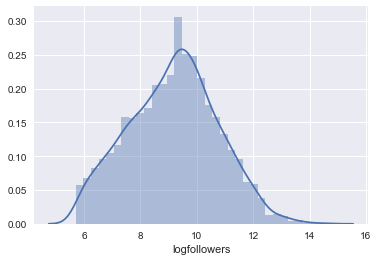

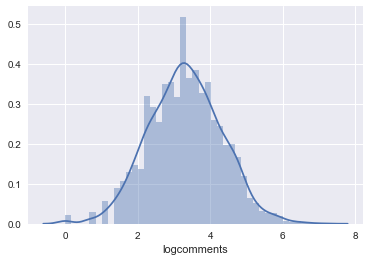

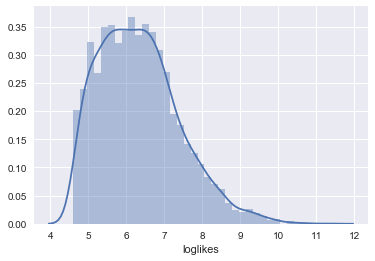

In [14]:
sns.distplot(df.logfollowers)
plt.show()
sns.distplot(df.logcomments)
plt.show()
sns.distplot(df.loglikes)
plt.show()

In [15]:
lr_model = ols(formula='reach~logfollowers + loglikes + logcomments', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  reach   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     645.8
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:59:29   Log-Likelihood:                -44497.
No. Observations:                3964   AIC:                         8.900e+04
Df Residuals:                    3960   BIC:                         8.903e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.934e+04   1905.748    -36.383      0.000   -7.31e+04   -6.56e+04
logfollowers   475.7973    245.816      1.936      0.053      -6.141     957.736
loglikes       1.21e+04    440.243     27.474      0.000    1.12e+04     1.3e+04
logcomments  -1033.4805    390.987     -2.643      0.008   -1800.035    -266.926
==============================================================================
Omnibus:                     6695.209   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7548949.352
Skew:                          11.310   Prob(JB):                         0.00
Kurtosis:                     215.587   Cond. No.                         78.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scatterplots 
- Next we looked at scatter plots of our data to further look for outliers and the correlation of our independent variable to our dependent variable. 

Text(0.5, 1.0, 'Followers Correlation plot')

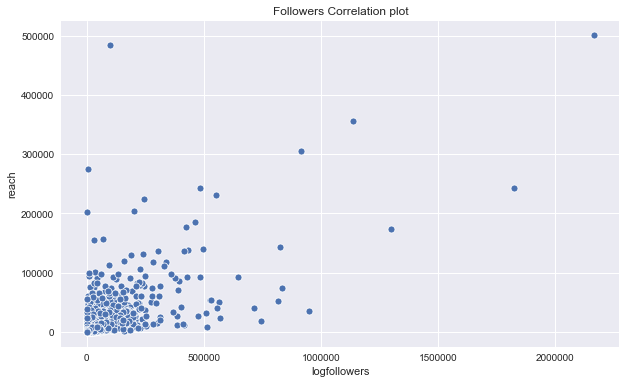

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.followers, y=df.reach)
plt.xlabel('logfollowers')
plt.ylabel('reach')
plt.title("Followers Correlation plot")
# plt.xlim(0,75_000)
# plt.ylim(0, 1_000_000)

Text(0.5, 1.0, 'Likes Correlation plot')

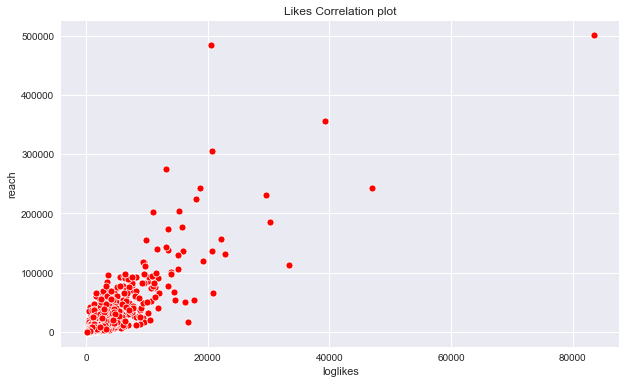

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df.reach, x=df.likes, color='red')
plt.xlabel('loglikes')
plt.ylabel('reach')
plt.title("Likes Correlation plot")

Text(0.5, 1.0, ' Comments Correlation plot')

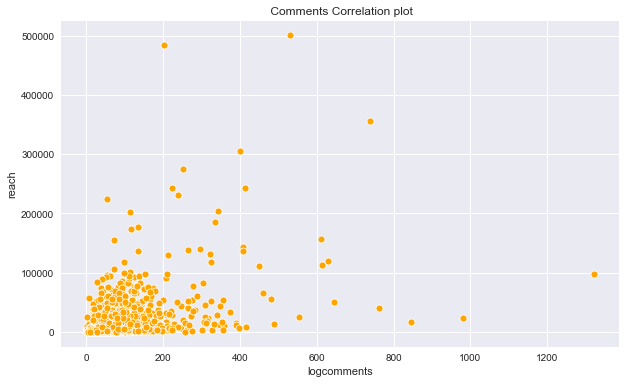

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df.reach, x=df.comments, color='orange')
plt.xlabel('logcomments')
plt.ylabel('reach')
plt.title(" Comments Correlation plot")

Now look at the data again to see if there are better stats. 

In [19]:
df.describe()  

,followers,likes,comments,impressions,reach,logfollowers,logcomments,loglikes
count,3.964000e+03,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000,3964.000000
mean,3.129303e+04,1154.968971,46.018668,10488.076186,8247.674067,9.149557,3.311034,6.337382
std,8.305952e+04,2652.701190,64.735364,28801.698750,22151.026399,1.580993,1.009953,1.064115
min,3.010000e+02,100.000000,1.000000,220.000000,165.000000,5.707110,0.000000,4.605170
25%,3.046000e+03,248.000000,14.000000,1543.000000,1183.500000,8.021584,2.639057,5.513429
50%,1.026950e+04,507.500000,27.000000,3243.000000,2555.000000,9.236934,3.295837,6.229496
75%,2.728875e+04,1071.500000,54.000000,8410.250000,6744.500000,10.214230,3.988984,6.976814
max,2.164278e+06,83472.000000,1322.000000,679341.000000,500225.000000,14.587597,7.186901,11.332267


### Add Test Reach to the original data Frame to check for accuracy

In [20]:
df['test_reach'] = lr_model.predict(df)

In [21]:
df['reach_diff'] =  df['test_reach'] - df['reach']

In [22]:
df['diff_ratio'] = (df.reach_diff / df.reach)*100

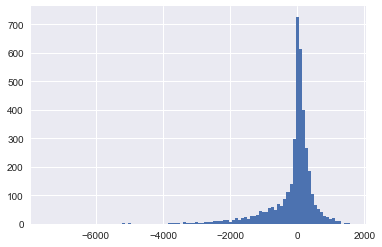

In [23]:
x = plt.hist(df.diff_ratio, bins = 100)

In [24]:
mean_squared_error(df.reach, df.test_reach)**.5

18149.03299485673

In [25]:
df.head()

,followers,likes,comments,impressions,reach,logfollowers,logcomments,loglikes,test_reach,reach_diff,diff_ratio
0,100276.0,1472.0,69.0,6209.0,5302.0,11.515682,4.234107,7.294377,19994.576708,14692.576708,277.113857
1,10299.0,562.0,11.0,710.0,574.0,9.239802,2.397895,6.331502,9163.196956,8589.196956,1496.375776
2,40025.0,1600.0,133.0,3371.0,2789.0,10.597260,4.890349,7.377759,19887.900657,17098.900657,613.083566
3,22071.0,807.0,34.0,11333.0,8932.0,10.002020,3.526361,6.693324,12735.933445,3803.933445,42.587701
4,24390.0,1467.0,76.0,6198.0,4824.0,10.101928,4.330733,7.290975,19180.900507,14356.900507,297.614024


In [26]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

likes = df["loglikes"].values.reshape(-1, 1)
comments = df["logcomments"].values.reshape(-1, 1)
followers = df["logfollowers"].values.reshape(-1, 1)

regression_1.fit(likes, df["reach"])
regression_2.fit(comments, df["reach"])
regression_3.fit(followers, df["reach"])

# Make predictions using the testing set
pred_1 = regression_1.predict(likes)
pred_2 = regression_2.predict(comments)
pred_3 = regression_3.predict(followers)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

[11899.1851941]
[8018.15700911]
[5616.27484314]


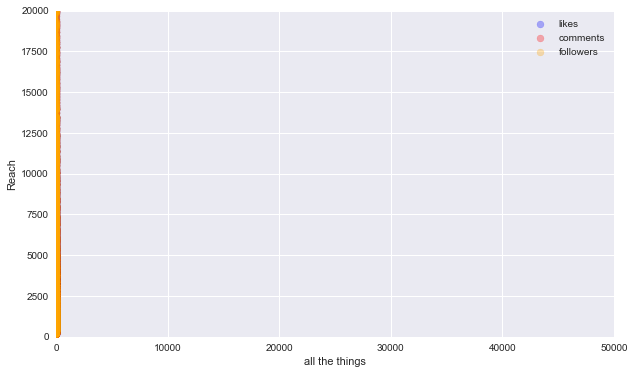

In [27]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(likes, df["reach"],  color='blue', alpha = 0.3, label = "likes")
plt.scatter(comments, df["reach"],  color='red', alpha = 0.3, label = "comments")
plt.scatter(followers, df["reach"],  color='orange', alpha = 0.3, label = "followers")

plt.plot(likes, pred_1,  color='blue', linewidth=2)
plt.plot(comments, pred_2,  color='red', linewidth=2)
plt.plot(followers, pred_3,  color='orange', linewidth=2)
plt.ylabel("Reach")
plt.xlabel("all the things")
plt.xlim(0,50000)
plt.ylim(0,20000)
plt.legend();

## Summary of trial 9
Trying to add log transformation to the grouped user model. This did not create a decent test result. R-Squared is now just .32 and our histogram of accuracy shows many points all the way out to -2000% off. 